In [19]:
import sys
sys.path.insert(1,'..')
import learnHeat as lh
from importlib import reload
lh = reload(lh)
import pygsp as pg
import numpy as np
import scores_table as scort
scort = reload(scort)
import matplotlib.pyplot as plt
import os, pickle, datetime

In [51]:
#Nvec = [i*5 for i in range(2,9)]
Nvec = [10,20,30,40]
exp = 10
alpha = 0.01
beta = 0.1
tau0 = [0.5,1,2.5,4]
max_iter = 50
score_res = np.zeros([len(Nvec),exp,3,2])
all_laplacians = []
learned_laplacians = []

for n in range(len(Nvec)):
    N = Nvec[n]
    for j in range(exp):
        BA = lh.heat_graph_BA(N)
        ER = lh.heat_graph_ER(N)
        RBF = lh.heat_graph_RBF(N)
        L = [BA, ER, RBF]
        X = []
        for l in L:
            X.append(lh.create_deltas(l,tau0))
        Learned = []
        for x in X:
            res = lh.learn_heat(x,tau0=tau0,alpha=alpha,beta=beta,max_iter=max_iter)
            Learned.append(res["L"])
        for k in range(len(L)):
            score_res[n,j,k,:] = scort.both_scores(lh.heat_persistent(Learned[k],N*(N-1)//2),L[k])
        all_laplacians.append(L)
        learned_laplacians.append(Learned)

folder_name = f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}"
os.mkdir(folder_name)

pickle.dump(L, open(f"{folder_name}/L.pkl", "wb"))
pickle.dump(Learned, open(f"{folder_name}/Learned.pkl", "wb"))
np.save(f"{folder_name}/score_res.npy", score_res)

# Save the data to a text file
filename = f"{folder_name}/data.txt"
with open(filename, 'w') as file:
    file.write(f"Nvec: {Nvec}\n")
    file.write(f"exp: {exp}\n")
    file.write(f"alpha: {alpha}\n")
    file.write(f"beta: {beta}\n")
    file.write(f"tau0: {tau0}\n")
    file.write(f"max_iter: {max_iter}\n")

print("Folder and files created successfully.")
        

/home/aner/Documents/math/learning_graphs/scaling_of_N/../scores_table.py:46: RuntimeWarning: invalid value encountered in scalar divide
  precision = true_positives / (true_positives + false_positives)
/home/aner/Documents/math/learning_graphs/scaling_of_N/../scores_table.py:48: RuntimeWarning: divide by zero encountered in scalar divide
  f_score = 2/  (1 / precision + 1 / recall)


Folder and files created successfully.


In [41]:
score_res.shape[:]

(4, 10, 3, 2)

Text(0, 0.5, 'F-measure')

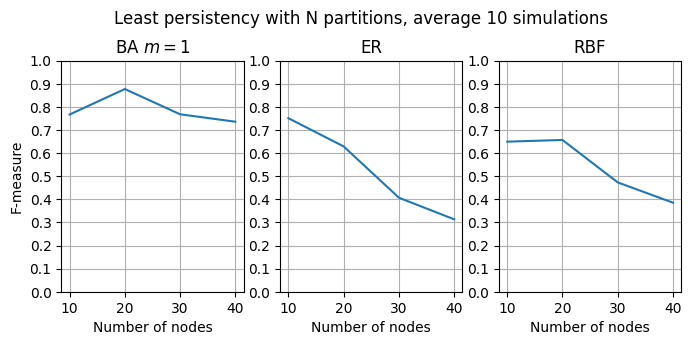

In [49]:
fig, ax = plt.subplots(1,3,figsize=(8,3),sharex=True)
plt.suptitle(r"Least persistency with N partitions, average 10 simulations",y=1.05)
titles = [r"BA $m=1$","ER","RBF"]
data = np.mean(score_res[:,:,:,0],axis=1)
Nvec = [10,20,30,40]
for r in range(3):
    ax[r].set_title(titles[r])
    ax[r].plot(Nvec,data[:,r])
    ax[r].set_yticks(np.linspace(0,1,11))
    ax[r].grid()
    ax[r].set_xlabel("Number of nodes")
ax[0].set_ylabel("F-measure")
